# Liquid/liquid equilibrium : ternary diagram and extraction


**Merci d'enregistrer le fichier sous votre propre nom de fichier avant les premières modifications.**

Ce code permet de tracer l'équilibre déterminer en TP L3 PPC puis de tracer les conodales et de calculer les extractions successives.

The code allow to create the ternary diagram (in weight %) for the isopropyl ether (diluant D), acetic acid (solute A) and water (solvent S). It plots the binodal curve and the tie lines (conodales in French). It is then possible to calculate the extraction for a given mixture  i.e. the composition and the weight of the extract and the rafinate phases. 

Pour tracer les données expérimentales sur le diagramme ternaire :
- vous devez introduire le volume d'acide en mL qui vous a permis de trouver le point de la binodale en ligne 21
- introduire les calculs permettant d'en déduire le fraction massique en acide (ligne 26) et en eau (ligne 27) pour ce point. Des calculs intermédiaires du volume d'acide en L et de la masse en acide en g doivent vous aider.
- vous devez ensuite introduire les fractions massiques en acide acétique pour les mélanges 2, 3 et 4 dans la ligne 32 pour la phase aqueuse (solvant) et dans la ligne 34 pour la phase organique (diluant). Ces fractions massiques seront à determiner à partir du volume de NaOH ayant permis la titration par le dosage acido-basique. Vous pouvez faire les calculs intermédiaires sur papier ou sous forme de lignes de codes. 
- vous devrez ensuite ajuster (par itérations manuelles) la fraction massique en eau pour que les point correspondants aux fractiosn massique d'acide que vous avez introduites précédemment se retrouvent sur la binodale (ligne 33 et 35)
- vous devez ensuite exécuter la cellule pour voir apparaître vos points expérimentaux sur le diagramme ternaire qui comportent déjà les points complémentaires donnés dans le cahier (ligne 15 à 18) 


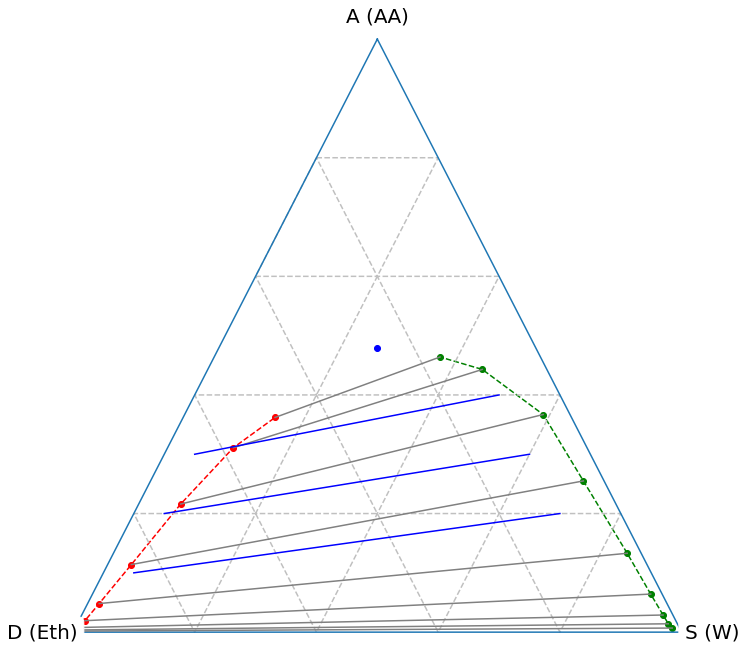

In [8]:

import numpy as np
import matplotlib.pyplot as plt
#S for solvent (water), A for solute (acetic adic) and D for diluant (diisopropyl ether)
#SP for solvent phase DP for diluant phase

rho_aa=1049.2 #kg/m3
rho_w=9982.3 #kg/m3
rho_et=7241 #kg/m3
M_aa=60.05 #kg/m3
M_w=18.015 #kg/m3
M_et=102.18 #kg/m3

# Equilibrium data 
xA_SP=np.array([0.69,  1.41,2.89,6.42,13.3,25.5,36.7,44.3,46.4])
xS_SP=np.array([98.1 , 97.1,95.5,91.7,84.4,71.1,58.9,45.1,37.1])
xA_DP=np.array([0.18,  0.37,0.79,1.93,4.82,11.4,21.6,31.1,36.2])
xS_DP=np.array([0.5,0.7,0.8,1,1.9,3.9,6.9,10.8,15.1])

#ENTER your binodale point (composition in acid, myxA, and mass fraction in Water, myxS)
v_aa=XX #ml
v_aaLXX  #L

#ENTRER LES FORMULES POUR CALCULER LA FRACTION MASSIQUE EN AA et en W
m_aa=rXX #g
x_aa_binXX
x_w_bin=XX

myxA=np.array([100*x_aa_bin])
myxS=np.array([100*x_w_bin])
#ENTER your 3 tie lines (conodales in French) points
myxA_SP=np.array([20,   30,    40])
myxS_SP=np.array([70,      60,    50]) #à déterminer manuellement pour que le point soit sur la binodale
myxA_DP=np.array([10,   20,    30])
myxS_DP=np.array([5,        5,     5]) #à déterminer manuellement pour que le point soit sur la binodale


#functions to change the coordinate from x,y plot to a ternary diagram
def tri(xA,xS):
    X=xS+xA/2
    Y=xA*np.sqrt(3)/2
    return X,Y
def detri(X,Y):
    xA=Y*2/np.sqrt(3)
    xS=X-xA/2
    return xA,xS
#calcul of the position of data point in the x,y plot
XSP,YSP=tri(xA_SP,xS_SP)
XDP,YDP=tri(xA_DP,xS_DP)
myX,myY=tri(myxA, myxS)
myXSP,myYSP=tri(myxA_SP, myxS_SP)
myXDP,myYDP=tri(myxA_DP, myxS_DP)

#plot of ternary diagram
def ter_diag():
    #Coordinates of based line
    xA_line=np.array([100,  0,0,100])
    xS_line=np.array([0,100,0,0])
    #Coordinates of intermediate line
    xA_uline=np.array([80, 80, 0,20,20, 0,80,60,60,0,40,40,0,60])
    xS_uline=np.array([0,  20,20,0 ,80,80, 0,0,40,40,0,60,60,0])
    #plot
    bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec="white", lw=1)
    fig, ax = plt.subplots(figsize = (12, 12))   
    plt.plot(XSP,YSP,color='green', marker='o', linestyle='dashed')
    plt.plot(XDP,YDP,color='red', marker='o', linestyle='dashed')

    X,Y=tri(xA_uline,xS_uline)
    plt.plot(X,Y,'--', color='silver')
    X,Y=tri(xA_line,xS_line)
    plt.plot(X,Y)
    for i in range(len(xA_SP)):
        X=np.array([XSP[i],XDP[i]])
        Y=np.array([YSP[i],YDP[i]])
        plt.plot(X,Y, color='grey')          
    ax.axis("off")
    plt.text(-5, 0, "D (Eth)", ha="center", va="center", size=20, bbox=bbox_props)
    plt.text(105, 0, "S (W)", ha="center", va="center", size=20, bbox=bbox_props)
    plt.text(50, 90, "A (AA)", ha="center", va="center", size=20, bbox=bbox_props)
    return

ter_diag()

plt.plot(myX,myY,color='blue', marker='o')
for i in range(len(myxA_SP)):
        X=np.array([myXSP[i],myXDP[i]])
        Y=np.array([myYSP[i],myYDP[i]])
        plt.plot(X,Y, color='blue')  



# 1 stage extraction

You will use this part of the code to determine from the liquid-liquid equilibrium (determined above) the extraction of a feed (diluant and solute) with a solvent. You will have to give the corresponding mass and the code will calculate and plot the extraction.

Pour tracer la construction graphique pour l'extraction simple sur le diagramme ternaire :
- vous devez introduire les masses en acide, en diluant et en solvant dans les premières lignes du code
- executer la cellule 


The mixture will lead to 2 phases and the mixure is located between the tie lines 5 and 6


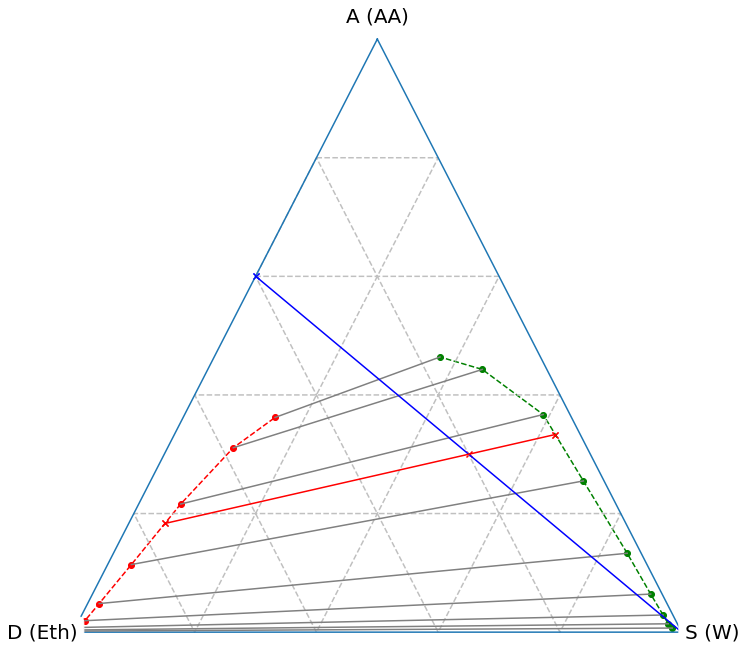

In [33]:
#Introduce the mass of the mixture
#mass in the feed
m_A=12.036
m_D=8.018
#Solvent
m_S=20.064

#calculation of mass fraction
m_M=m_A+m_D+m_S
XA_F=100*m_A/(m_A+m_D)
XA_M=100*m_A/m_M
XS_M=100*m_S/m_M
#plot ternary diagram
ter_diag()

#plot the mixture point
X_F,Y_F=tri(XA_F,0)
X_M,Y_M=tri(XA_M,XS_M)
X_S,Y_S=tri(0.,100.)
plt.scatter(X_M,Y_M, color='red', marker='x')
plt.scatter(X_F,Y_F, color='blue', marker='x')
plt.plot([X_F,X_S],[Y_F,Y_S], color='blue', marker='x')

#find the two tie lines bordering the mixture 
c1=0
c2=0
for i in range(len(xA_SP)):
    if Y_M < YDP[i]+(YSP[i]-YDP[i])*(X_M-XDP[i])/(XSP[i]-XDP[i]):
        c1=i-1
        c2=i
        print ('The mixture will lead to 2 phases and the mixure is located between the tie lines', c1,'and',c2)
        break
if c2==0 : print ('There is only one phase : the separation is impossible')

#determination of the tie line for the mixture 

#function to find the intersection point between two lines AB and CD
def intersec(xA,yA,xB,yB,xC,yC,xD,yD):
    #slope of line A B
    AB=(yB-yA)/(xB-xA)
    #slope of line A B
    CD=(yD-yC)/(xD-xC)
    x=-(CD*xC-yC-AB*xA+yA)/(AB-CD)
    y=AB*(x-xA)+yA
    return x,y

#find the intersection point I between the two bordering tie line
X_I,Y_I=intersec(XDP[c1],YDP[c1],XSP[c1],YSP[c1],XDP[c2],YDP[c2],XSP[c2],YSP[c2])
#find the intersection point between IM and the binodal curve (diluant side)
X_DC,Y_DC=intersec(X_I,Y_I,X_M,Y_M,XDP[c2],YDP[c2],XDP[c1],YDP[c1])
#find the intersection point between IM and the binodal curve (solvant side)
X_SC,Y_SC=intersec(X_I,Y_I,X_M,Y_M,XSP[c2],YSP[c2],XSP[c1],YSP[c1])
plt.scatter(X_DC,Y_DC, color='red', marker='x')
plt.scatter(X_SC,Y_SC, color='red', marker='x')
plt.plot([X_SC,X_DC],[Y_SC,Y_DC], color='red', marker='x')
plt.show()

>The mixture is below the spinodal curve : there will be two phases. The extraction is then possible by separating the two phases.
    
**Determine the composition of the phases and their weight.**
>The plot of the tie line that pass through the mixture point allow to determine the composition of the two phases.
>The weight of the two phases (the mass of the raffinate rich in diluant, $m_R$ and the mass of the extract rich in solvant, $m_E$) can be determined by a global mass balance and a partial mass balance on the solute :
>$$m_M=m_R+m_E$$
>$$m_M x_{MA} = m_R x_{RA} + m_E x_{EA}$$
It leads to the following relationship for the mass of extract :
>$$m_E=m_M\frac{ x_{MA}-x_{RA}}{x_{EA}-x_{RA}}$$





In [5]:
print ('The composition of the raffinate phase, R, is :')
xA,xS=detri(X_DC,Y_DC)
print ('x_A=', round(xA,2),'% x_S=', round(xS,2),'% x_D=', round(100-xS-xA,2),'%')
print ('The composition of the extract phase, E, is :')
yA,yS=detri(X_SC,Y_SC)
print ('y_A=', round(yA,2),'% y_S=', round(yS,2),'% y_D=', round(100-yS-yA,2),'%')
m_E=m_M*(XA_M-xA)/(yA-xA)
m_R=m_M-m_E
print ('The mass of extract is :', round(m_E,2), 'g and the mass of raffinate is : ', round(m_R,2), 'g ')

The composition of the raffinate phase, R, is :
x_A= 18.32 % x_S= 5.94 % x_D= 75.74 %
The composition of the extract phase, E, is :
y_A= 33.33 % y_S= 62.57 % y_D= 4.1 %
The mass of extract is : 31.12 g and the mass of raffinate is :  8.88 g 


> Now you can **play** with the code to find the composition of the phases (if any) by changing of m_A and m_D. You should then be able to fell the ternary graphical construction and the link with the mass balance.

# 2 stages extraction in cross-current mode

Pour tracer la construction graphique pour l'extraction double sur le diagramme ternaire :
- vous devez introduire les masses en acide, en diluant et en solvant dans les premières lignes du code
- executer la cellule 

The mixture 1 will lead to 2 phases and the mixure is located between the tie lines 6 and 7
The composition of the raffinate phase, R1, is :
x_A= 30.95 % x_S= 10.74 % x_D= 58.31 %
The composition of the extract phase, E1, is :
y_A= 44.2 % y_S= 45.28 % y_D= 10.52 %
The mass of extract is : 20.15 g and the mass of raffinate is :  10.12 g 
The mixture 2 will lead to 2 phases and the mixure is located between the tie lines 4 and 5

The composition of the raffinate phase, R2, is :
x_A= 7.56 % x_S= 2.73 % x_D= 89.71 %
The composition of the extract phase, E2, is :
y_A= 18.78 % y_S= 78.43 % y_D= 2.79 %
The mass of extract is : 14.2 g and the mass of raffinate is :  6.13 g 


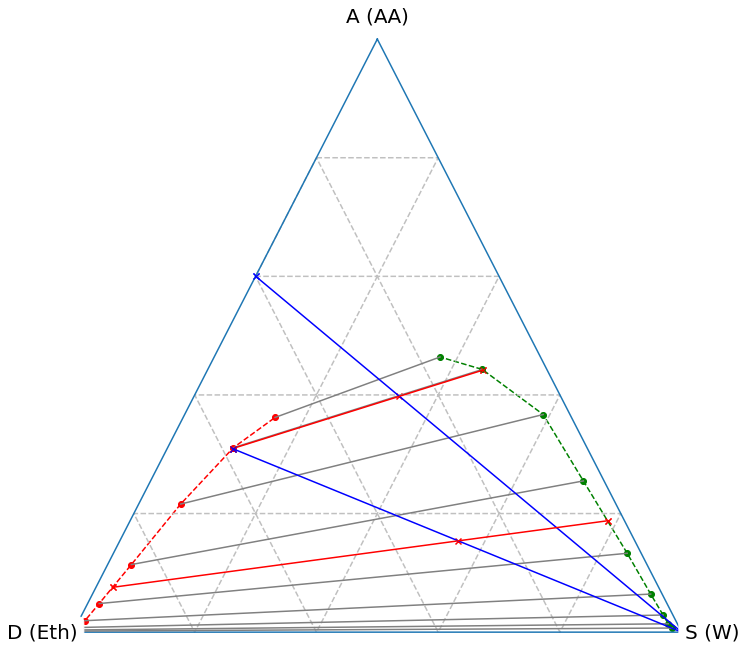

In [34]:
#Introduce the mass of the mixture
#mass in the feed
m_A1=12.036
m_D1=8.017
#Solvent
m_S1=10.21
m_S2=10.22

#calculation of mass fraction
m_M1=m_A1+m_D1+m_S1
XA_F1=100*m_A1/(m_A+m_D)
XA_M1=100*m_A1/m_M1
XS_M1=100*m_S1/m_M1
#plot ternary diagram
ter_diag()

#plot the points and the line between the feed, the mixture 1 and the solvent
X_F1,Y_F1=tri(XA_F1,0)
X_M1,Y_M1=tri(XA_M1,XS_M1)
X_S,Y_S=tri(0.,100.)
plt.scatter(X_M1,Y_M1, color='red', marker='x')
plt.scatter(X_F1,Y_F1, color='blue', marker='x')
plt.plot([X_F,X_S],[Y_F,Y_S], color='blue', marker='x')

#find the two tie lines bordering the mixture 
c1=0
c2=0
for i in range(len(xA_SP)):
    if Y_M1 < YDP[i]+(YSP[i]-YDP[i])*(X_M1-XDP[i])/(XSP[i]-XDP[i]):
        c1=i-1
        c2=i
        print ('The mixture 1 will lead to 2 phases and the mixure is located between the tie lines', c1,'and',c2)
        break
if c2==0 : print ('There is only one phase : the separation is impossible')

#determination of the tie line for the mixture 

#function to find the intersection point between two lines AB and CD
def intersec(xA,yA,xB,yB,xC,yC,xD,yD):
    #slope of line A B
    AB=(yB-yA)/(xB-xA)
    #slope of line A B
    CD=(yD-yC)/(xD-xC)
    x=-(CD*xC-yC-AB*xA+yA)/(AB-CD)
    y=AB*(x-xA)+yA
    return x,y

#find the intersection point I between the two bordering tie line
X_I,Y_I=intersec(XDP[c1],YDP[c1],XSP[c1],YSP[c1],XDP[c2],YDP[c2],XSP[c2],YSP[c2])
#find the intersection point between IM and the binodal curve (diluant side)
X_DC1,Y_DC1=intersec(X_I,Y_I,X_M1,Y_M1,XDP[c2],YDP[c2],XDP[c1],YDP[c1])
#find the intersection point between IM and the binodal curve (solvant side)
X_SC1,Y_SC1=intersec(X_I,Y_I,X_M1,Y_M1,XSP[c2],YSP[c2],XSP[c1],YSP[c1])

print ('The composition of the raffinate phase, R1, is :')
xA1,xS1=detri(X_DC1,Y_DC1)
print ('x_A=', round(xA1,2),'% x_S=', round(xS1,2),'% x_D=', round(100-xS1-xA1,2),'%')
print ('The composition of the extract phase, E1, is :')
yA1,yS1=detri(X_SC1,Y_SC1)
print ('y_A=', round(yA1,2),'% y_S=', round(yS1,2),'% y_D=', round(100-yS1-yA1,2),'%')
m_E1=m_M1*(XA_M1-xA1)/(yA1-xA1)
m_R1=m_M1-m_E1
print ('The mass of extract is :', round(m_E1,2), 'g and the mass of raffinate is : ', round(m_R1,2), 'g ')

plt.scatter(X_DC1,Y_DC1, color='red', marker='x')
plt.scatter(X_SC1,Y_SC1, color='red', marker='x')
plt.plot([X_SC1,X_DC1],[Y_SC1,Y_DC1], color='red', marker='x')

#calculation of mass fraction
m_M2=m_R1+m_S2
XA_F2=xA1
XA_M2=xA1*m_R1/m_M2
XS_M2=(xS1*m_R1+100* m_S2)/m_M2

#plot the points and the line between the feed, the mixture 1 and the solvent
X_F2,Y_F2=tri(xA1,xS1)
X_M2,Y_M2=tri(XA_M2,XS_M2)
X_S,Y_S=tri(0.,100.)
plt.scatter(X_M2,Y_M2, color='red', marker='x')
plt.scatter(X_F2,Y_F2, color='blue', marker='x')
plt.plot([X_F2,X_S],[Y_F2,Y_S], color='blue', marker='x')

#find the two tie lines bordering the mixture 
c1=0
c2=0
for i in range(len(xA_SP)):
    if Y_M2 < YDP[i]+(YSP[i]-YDP[i])*(X_M2-XDP[i])/(XSP[i]-XDP[i]):
        c1=i-1
        c2=i
        print ('The mixture 2 will lead to 2 phases and the mixure is located between the tie lines', c1,'and',c2)
        break
if c2==0 : print ('There is only one phase : the separation is impossible')

#find the intersection point I between the two bordering tie line
X_I,Y_I=intersec(XDP[c1],YDP[c1],XSP[c1],YSP[c1],XDP[c2],YDP[c2],XSP[c2],YSP[c2])
#find the intersection point between IM and the binodal curve (diluant side)
X_DC2,Y_DC2=intersec(X_I,Y_I,X_M2,Y_M2,XDP[c2],YDP[c2],XDP[c1],YDP[c1])
#find the intersection point between IM and the binodal curve (solvant side)
X_SC2,Y_SC2=intersec(X_I,Y_I,X_M2,Y_M2,XSP[c2],YSP[c2],XSP[c1],YSP[c1])

print ('')
print ('The composition of the raffinate phase, R2, is :')
xA2,xS2=detri(X_DC2,Y_DC2)
print ('x_A=', round(xA2,2),'% x_S=', round(xS2,2),'% x_D=', round(100-xS2-xA2,2),'%')
print ('The composition of the extract phase, E2, is :')
yA2,yS2=detri(X_SC2,Y_SC2)
print ('y_A=', round(yA2,2),'% y_S=', round(yS2,2),'% y_D=', round(100-yS2-yA2,2),'%')
m_E2=m_M2*(XA_M2-xA2)/(yA2-xA2)
m_R2=m_M2-m_E2
print ('The mass of extract is :', round(m_E2,2), 'g and the mass of raffinate is : ', round(m_R2,2), 'g ')

plt.scatter(X_DC2,Y_DC2, color='red', marker='x')
plt.scatter(X_SC2,Y_SC2, color='red', marker='x')
plt.plot([X_SC2,X_DC2],[Y_SC2,Y_DC2], color='red', marker='x')
plt.show()

**Question bonus +++**

Faire les calculs pour une extraction successive avec trois étages croisés avec 10g 5g 5g de solvent aux étages 1 2 et 3 respectivement. Est-ce que cela permet d'augmenter le rendement d'extraction ?